# KNN With Tumor Dataset
* import dataset
* dataset Visualization
* finding best k values
* knn with sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("data.csv")

In [4]:
#Dropping useless values
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()
#Malignant = M -> Malignant tumor
#Benign = B -> Benign tumor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

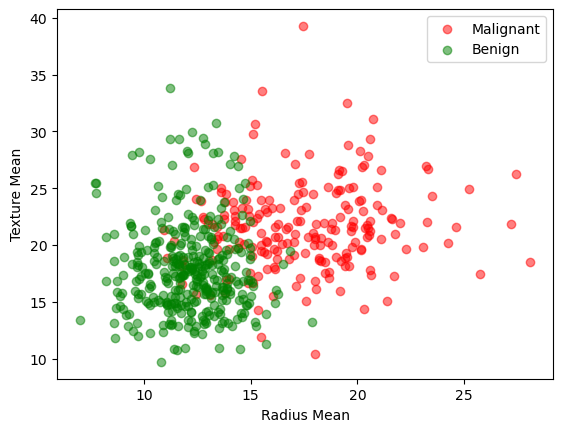

In [6]:
#Scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label = "Malignant",alpha=0.5)
plt.scatter(B.radius_mean,B.texture_mean,color = "green",label="Benign",alpha=0.5)
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend()
plt.show()

In [7]:
# Converting diagnosis values to numeric
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

# x and y
x_data = data.drop(["diagnosis"],axis=1)
y = data.diagnosis.values

In [8]:
# normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


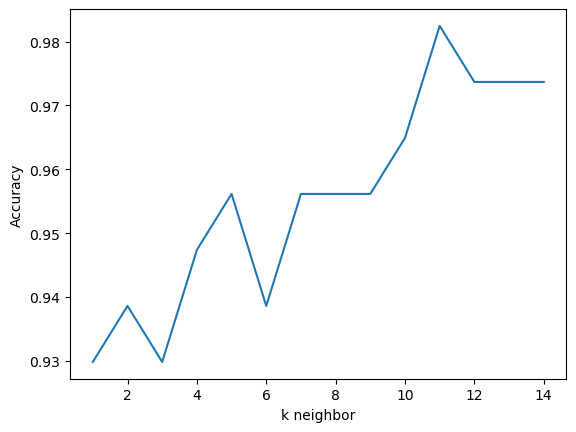

In [10]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

# Finding best k value

score_list = []

for i in range(1,15):
    
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test.values,y_test))


plt.plot(range(1,15),score_list)
plt.xlabel("k neighbor")
plt.ylabel("Accuracy")
plt.show()



In [11]:
# We can see best value of k in the plot it is 11, let's see in code
 
best_k = 0
for i in range(len(score_list)):
    
    if score_list[i] > score_list[best_k]:
        best_k = i


best_k = best_k + 1 # because score_list[0] k = 1, score_list[1] k = 2,...score_list[n] k = n+1

print(score_list)
print("Best value of neighbor = ",best_k)

[0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]
Best value of neighbor =  11


In [12]:

knn = KNeighborsClassifier(n_neighbors=best_k) #
knn.fit(x_train,y_train)

prediction = knn.predict(x_test.values)

print("{} nn score: {} ".format(best_k,knn.score(x_test.values,y_test)))


11 nn score: 0.9824561403508771 


# Conclusion
* If n_neighbors values is 11, it is give us the best result